In [2]:
%config IPCompleter.greedy=True

In [26]:
import tensorflow as tf
from tensorflow.contrib.keras.api.keras.models import Sequential, Model
from tensorflow.contrib.keras.api.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Input, concatenate
from tensorflow.contrib.keras.api.keras.datasets import cifar10
from tensorflow.contrib.keras.api.keras.optimizers import SGD
from tensorflow.contrib.keras.api.keras.utils import to_categorical, plot_model
from tensorflow.contrib.keras.api.keras.models import model_from_json
from tensorflow.contrib.keras.api.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [4]:
batch_size = 32
n_classes = 10
epochs = 40

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
height = x_train.shape[1]
width = x_train.shape[2]

In [7]:
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

In [8]:
print('Training dataset: ', x_train.shape, y_train.shape)
print('Validation dataset: ', x_val.shape, y_val.shape)
print('Test dataset: ', x_test.shape, y_test.shape)

Training dataset:  (45000, 32, 32, 3) (45000, 1)
Validation dataset:  (5000, 32, 32, 3) (5000, 1)
Test dataset:  (10000, 32, 32, 3) (10000, 1)


In [9]:
def plot(data, answer, text, begin=0, end = 5):
    cols = 3
    fig = plt.figure()
    label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    print(text)
    count = 0
    for i in range(begin, end):
        a = fig.add_subplot(cols, np.ceil(n_classes/float(cols)), count + 1)
        #img_num = np.random.randint(data.shape[0])
        image = data[i]
        id = answer[i]
        pos = np.argmax(id)
        plt.imshow(image)
        a.set_title(label_names[pos])
        count += 1
    fig.set_size_inches(8,8)
    plt.show()

training:


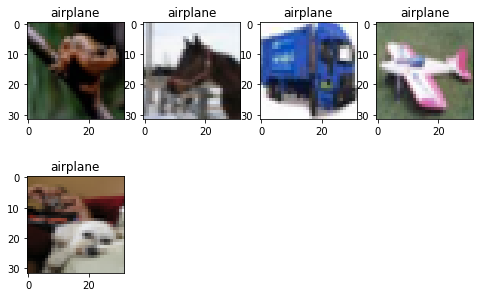

validation:


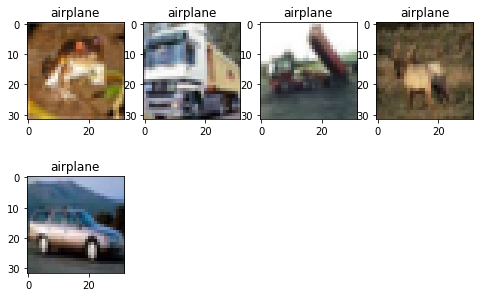

test:


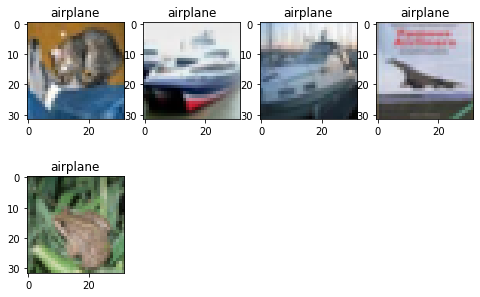

In [10]:
plot(x_train, y_train, 'training:')
plot(x_val, y_val, 'validation:')
plot(x_test, y_test, 'test:')

In [11]:
# Convert labels to categorical
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)
y_test = to_categorical(y_test, n_classes)

In [12]:
# Datasets pre-processing
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

In [13]:
def optimizer():
    return SGD(lr=1e-2)

In [46]:
def create_model2():
    input_shape = Input(shape=(height, width, 3))
    merged = input_shape
    for i in range(0, 2):
        tower_1 = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', strides=2)(merged)


        
        tower_2 = Conv2D(filters=128, kernel_size=(1,1), padding='same', activation='relu', strides=1)(merged)
        tower_2 = MaxPooling2D(pool_size=(2,2))(tower_2)
        
        tower_3 = Conv2D(filters=128, kernel_size=(7,7), padding='same', activation='relu', strides=2)(merged)


        merged = concatenate([tower_1, tower_2, tower_3], axis=1)
        
        merged = Dropout(0.25)(merged)
    
    merged = Flatten()(merged)    
    out = Dense(64, activation='relu')(merged)
    out = Dense(n_classes, activation='softmax')(out)
    
    model = Model(input_shape, out)
    plot_model(model, to_file='teste.png')
    
    return model
    

In [16]:
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(height, width, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(2, 2), strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    return model

In [52]:
# model = create_model2()
# model.compile(optimizer=optimizer(),
#               loss='categorical_crossentropy',
#               metrics=['accuracy']
#               )
model.fit(x_train, y_train, batch_size=batch_size, epochs=2, validation_data=(x_val,y_val),verbose=1)
model.summary()

Train on 45000 samples, validate on 5000 samples
Epoch 1/2
45000/45000 [==============================] - 884s 20ms/sample - loss: 1.3075 - acc: 0.5342 - val_loss: 1.5372 - val_acc: 0.4630
Epoch 2/2
45000/45000 [==============================] - 873s 19ms/sample - loss: 1.2455 - acc: 0.5571 - val_loss: 1.2440 - val_acc: 0.5578
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 32, 32, 128)  512         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 16, 16, 128)  3584   

In [53]:
def save_model(model):
    # serialize model to JSON
    model_json = model.to_json()
    with open("model4.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model4.h5")
    print("Saved model to disk")

In [18]:
# load json and create model
def load_model():
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
    return loaded_model


In [19]:
model = load_model()
model.compile(optimizer=optimizer(),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Loaded model from disk


In [54]:
save_model(model)

Saved model to disk


In [34]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100), "| Loss: %.5f" % (scores[0]))

Accuracy: 62.50% | Loss: 1.76864


In [22]:
result = model.predict(x_val)

Resultado


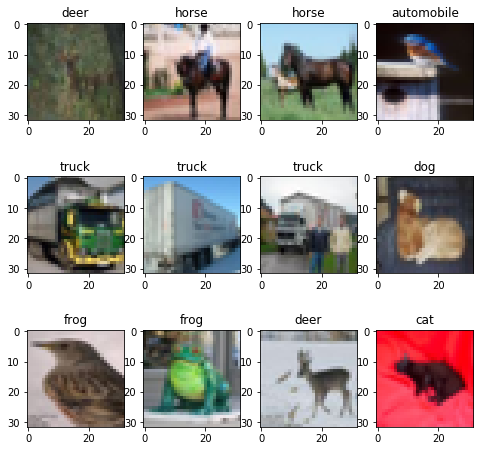

In [40]:
plot(x_val, result, "Resultado", 10,22)

In [24]:
result

array([[9.30868191e-06, 3.92514230e-05, 7.62291951e-03, ...,
        8.69945565e-04, 5.77550600e-06, 6.91683672e-05],
       [3.81624210e-04, 1.17069604e-02, 1.65040501e-06, ...,
        1.33961094e-05, 4.61795898e-05, 9.87844110e-01],
       [1.26701202e-02, 4.07584235e-02, 4.72362910e-04, ...,
        2.46465392e-02, 2.27586555e-04, 9.17974174e-01],
       ...,
       [4.55838046e-04, 2.82932393e-04, 2.90472955e-02, ...,
        1.04941083e-02, 9.81658159e-05, 2.10982194e-04],
       [5.46591082e-06, 3.97047515e-08, 1.38025098e-02, ...,
        3.59100811e-02, 5.04784694e-08, 1.40320117e-06],
       [7.17915100e-05, 8.50388096e-06, 3.43948215e-01, ...,
        2.17390334e-04, 1.18553864e-04, 8.91576917e-07]], dtype=float32)

In [ ]:
y